# TP2 - Text-mining and chatbots [CONLL]
**Students**:
- Thanh Gia Hieu KHUONG
- Ragi BHATT
- Benedictus Kent RACHMAT

## Download the dataset

In [ ]:
%%bash

git clone --quiet https://github.com/ktgiahieu/text-mining-class.git
unzip -q /content/text-mining-class/TP2/QUAERO_FrenchMed_TP2021.zip

PATH="/content/QUAERO_FrenchMed_TP2021"

## Import

In [20]:
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [22]:
def get_statistics(dataset_dir):
  statistics = {}
  for split in ['train', 'dev', 'test']:
    for subset in ['EMEA', 'MEDLINE']:
      split_dir = os.path.join(dataset_dir, split, subset)

      if not os.path.exists(split_dir):
        continue

      # Iterate over each file in the split directory
      for file in os.listdir(split_dir):
          file_path = os.path.join(split_dir, file)

          # Read the file into a DataFrame
          conll_df = pd.read_csv(file_path, sep='\t', header=None, quoting=3, encoding='utf-8', comment='#', names=['Token', 'Entity'])

          conll_df.dropna(inplace=True)
          conll_df.reset_index(drop=True, inplace=True)

          # Number of tokens is simply the number of rows in the DataFrame
          num_tokens = conll_df.shape[0]
          
          # Entities are marked in BIO format, we need to count unique entities
          entities = conll_df[conll_df['Entity'] != 'O']['Entity']

          # Number of entities is counted by B- prefixes
          num_entities = entities.str.startswith('B-').sum()

          # Count of each unique entity type
          entity_type_counts = defaultdict(int)
          for entity in entities:
              entity_type = entity[2:] if entity != 'O' else entity
              entity_type_counts[entity_type] += 1

          # Number of unique entities is the number of unique B- and I- tags
          num_unique_entities = entities.nunique()

          # Number of entity types is the number of unique prefixes after 'B-' and 'I-'
          num_entity_types = len(entity_type_counts)

          # Save the statistics in a nested dictionary
          statistics[f"{subset}_{split}"] = {
              'num_tokens': num_tokens,
              'num_entities': num_entities,
              'num_unique_entities': num_unique_entities,
              'num_entity_types': num_entity_types,
              # 'entities_per_type': dict(entity_type_counts)
          }
  return statistics

def plot_statistics(statistics, category):
    # Define subsets and splits
    subsets = ['EMEA', 'MEDLINE']
    splits = ['train', 'dev', 'test']
    
    # Prepare the data for plotting
    data = {subset: [statistics[f"{subset}_{split}"][category] for split in splits] for subset in subsets}
    
    # Number of groups and bar width
    n_groups = len(splits)
    bar_width = 0.35
    index = np.arange(n_groups)
    
    # Create the bar plot
    plt.figure(figsize=(10, 5))
    for i, (subset, counts) in enumerate(data.items()):
        plt.bar(index + i * bar_width, counts, bar_width, label=subset)
    
    # Add labels, title, and legend
    plt.xlabel('Splits')
    plt.ylabel(category.replace('_', ' ').title())
    plt.title(f'{category.replace("_", " ").title()} per Split and Subset')
    plt.xticks(index + bar_width / 2, splits)
    plt.legend()
    plt.tight_layout()
    plt.show()

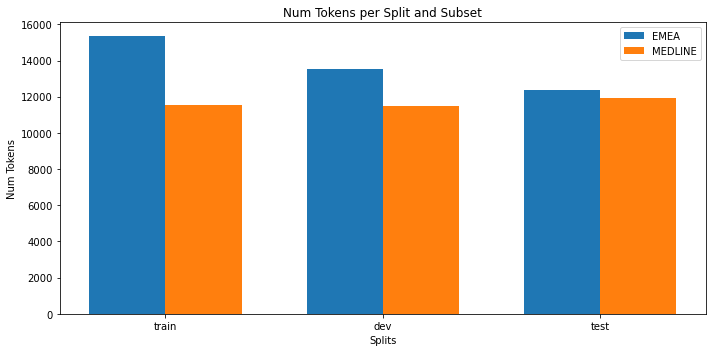

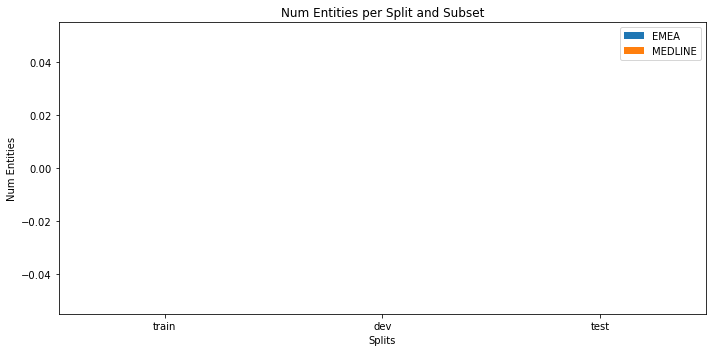

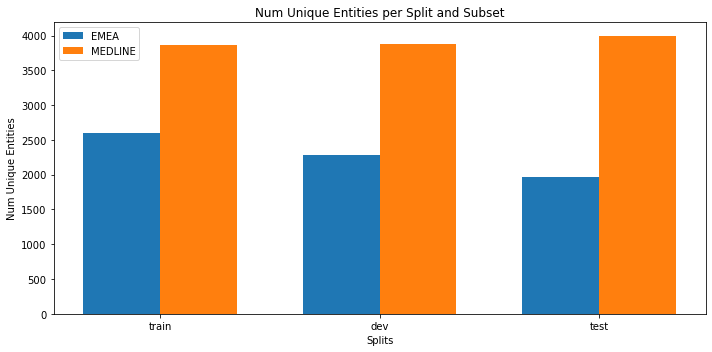

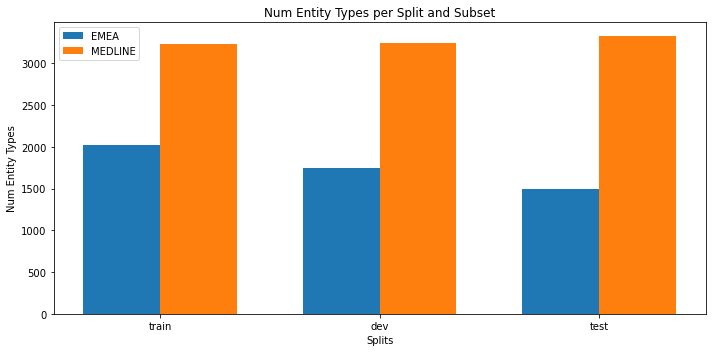

In [23]:
dataset_statistics = get_statistics("QUAERO_FrenchMed_TP2021/QUAERO_FrenchMed_conll/corpus")
for category in ['num_tokens', 'num_entities', 'num_unique_entities', 'num_entity_types']:
    plot_statistics(dataset_statistics, category)